# Gaussian Naive Bayes
Gaussian Naive Bayes implementation. This implementation requires that the given train and test sets are given in the form of Pandas Dataframes. This implementation also uses Scipy's nomral distrutibution strutures. 

In [1]:
import pandas as pd
from scipy.stats import norm

class GNB:
  def __predict(self, x: pd.DataFrame):
    probabilities = {}

    for label in self.labels:
      label_stats = self.posterior_matrix[label]
      final_prob = 1

      for feat_name in self.feature_names:
        feat_x = x[feat_name]
        mean = label_stats[feat_name]['mean']
        std = label_stats[feat_name]['std']
        dist = norm(mean, std)
        prob = dist.pdf(feat_x)
        final_prob = final_prob * prob

      probabilities[label] = final_prob
    
    high = 0
    best_label = 'error'

    for key, value in probabilities.items():
      if value > high:
        high = value
        best_label = key
        
    return best_label
  
  def fit(self, X_train: pd.DataFrame, y_train: pd.DataFrame):
    self.X_train = X_train
    self.y_train = y_train

    self.labels = y_train.iloc[:, 0].unique()

    self.feature_names = X_train.columns.tolist()
    self.labels_name = y_train.columns.tolist()[0]

    # Recontatenando o as features com as labels para fazer a filtragem depois
    df = pd.concat([X_train, y_train], axis=1)
    
    self.posterior_matrix = {}

    for label in self.labels:
      filtered_features = df[ df[self.labels_name] == label ]
      description = filtered_features.describe()
      stats = description.head(3).iloc[1: , :]
      self.posterior_matrix[label] = stats
  
  def predict(self, X: pd.DataFrame):
    results = []
    for _, row in X.iterrows():
      results.append(self.__predict(row))

    return results
    

  

# Data
## The Pygoscelis Dataset
The genus Pygoscelis ("rump-legged") contains three living species of penguins collectively known as "brush-tailed penguins".
- Pygoscelis adeliae (Adélie penguin)
- Pygoscelis antarctica (Chinstrap penguin)
- Pygoscelis papua (Gentoo penguin)
<!-- <img src="resources/Adelie_Penguin.jpg" alt="Adélie penguin" title="Pygoscelis adeliae" /> -->

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("penguins.csv")
df = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']]
df = df.dropna()

X = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y = df[['Species']]

#### Scaler and normalization

In [3]:
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

scaler = StandardScaler().fit(X.values)
features = scaler.transform(X.values)

X[X.columns[:]] = features

#### Train-test splitting

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

#### Fitting

In [5]:
gnb = GNB()
gnb.fit(X_train, y_train)

#### Prediction and classification report

In [6]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.96      0.79      0.87       136
Chinstrap penguin (Pygoscelis antarctica)       0.66      0.89      0.76        62
        Gentoo penguin (Pygoscelis papua)       0.98      1.00      0.99       110

                                 accuracy                           0.89       308
                                macro avg       0.87      0.89      0.87       308
                             weighted avg       0.91      0.89      0.89       308



#### Confusion matrix

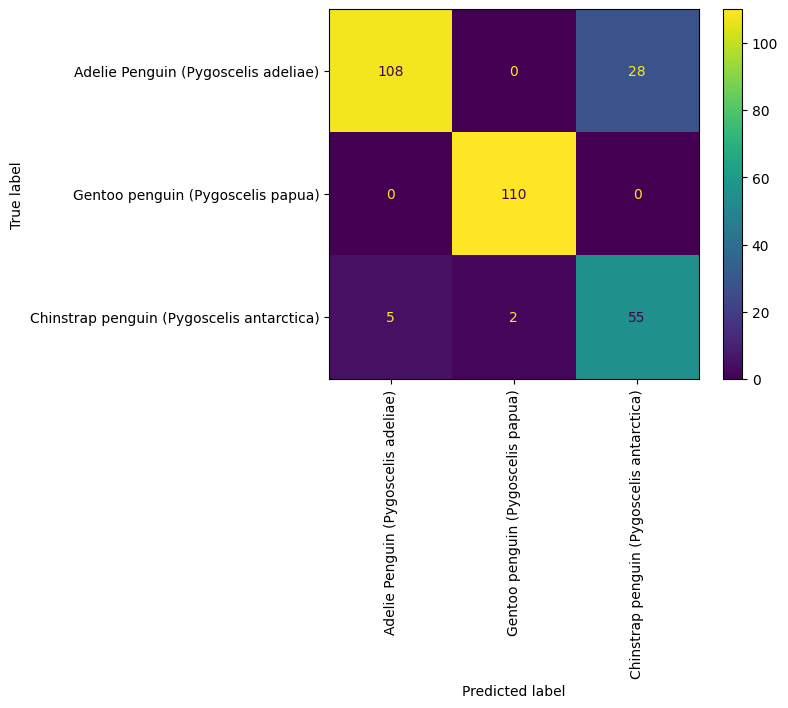

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=df['Species'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(xticks_rotation='vertical')
plt.show()